In [31]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Disable XLA
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

# Set logging level to avoid unnecessary warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# Clear TensorFlow session
from tensorflow.keras import backend as K
K.clear_session()

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lokesh\.cache\kagglehub\datasets\gti-upm\leapgestrecog\versions\1


In [51]:
dataset_path = "C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog"

In [53]:
os.listdir('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog')

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']

In [55]:
batch_size = 32
img_size = 224
num_classes = 10

In [57]:
def get_file_paths_and_labels(base_path):
    file_paths = []
    labels = []
    gesture_folders = [
        '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
        '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
    ]
    label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
    
    for subject in os.listdir(base_path):
        subject_path = os.path.join(base_path, subject)
        if os.path.isdir(subject_path):
            for gesture in gesture_folders:
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, img_file)
                        file_paths.append(img_path)
                        labels.append(label_map[gesture])
    return file_paths, labels

In [59]:
def display_images(file_paths, labels, label_map):
    unique_labels = list(label_map.values())
    label_to_name = {v: k for k, v in label_map.items()}
    
    plt.figure(figsize=(20, 20))
    for idx, label in enumerate(unique_labels):
        label_paths = [file_paths[i] for i in range(len(labels)) if labels[i] == label][:5]
        for i, img_path in enumerate(label_paths):
            img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
            img = img_to_array(img) / 255.0
            plt.subplot(len(unique_labels), 5, idx * 5 + i + 1)
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(label_to_name[label])
            plt.axis('off')
    plt.show()

In [61]:
file_paths, labels = get_file_paths_and_labels(dataset_path)

In [63]:
print(f"First 10 file paths: {file_paths[:10]}")
print(f"First 10 labels: {labels[:10]}")

First 10 file paths: ['C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0001.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0002.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0003.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0004.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0005.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0006.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0007.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0008.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0009.png', 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog\\00\\01_palm\\frame_00_01_0010.png']
First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [65]:
if not file_paths or not labels:
    raise ValueError("No file paths or labels found. Please check the dataset path and structure.")

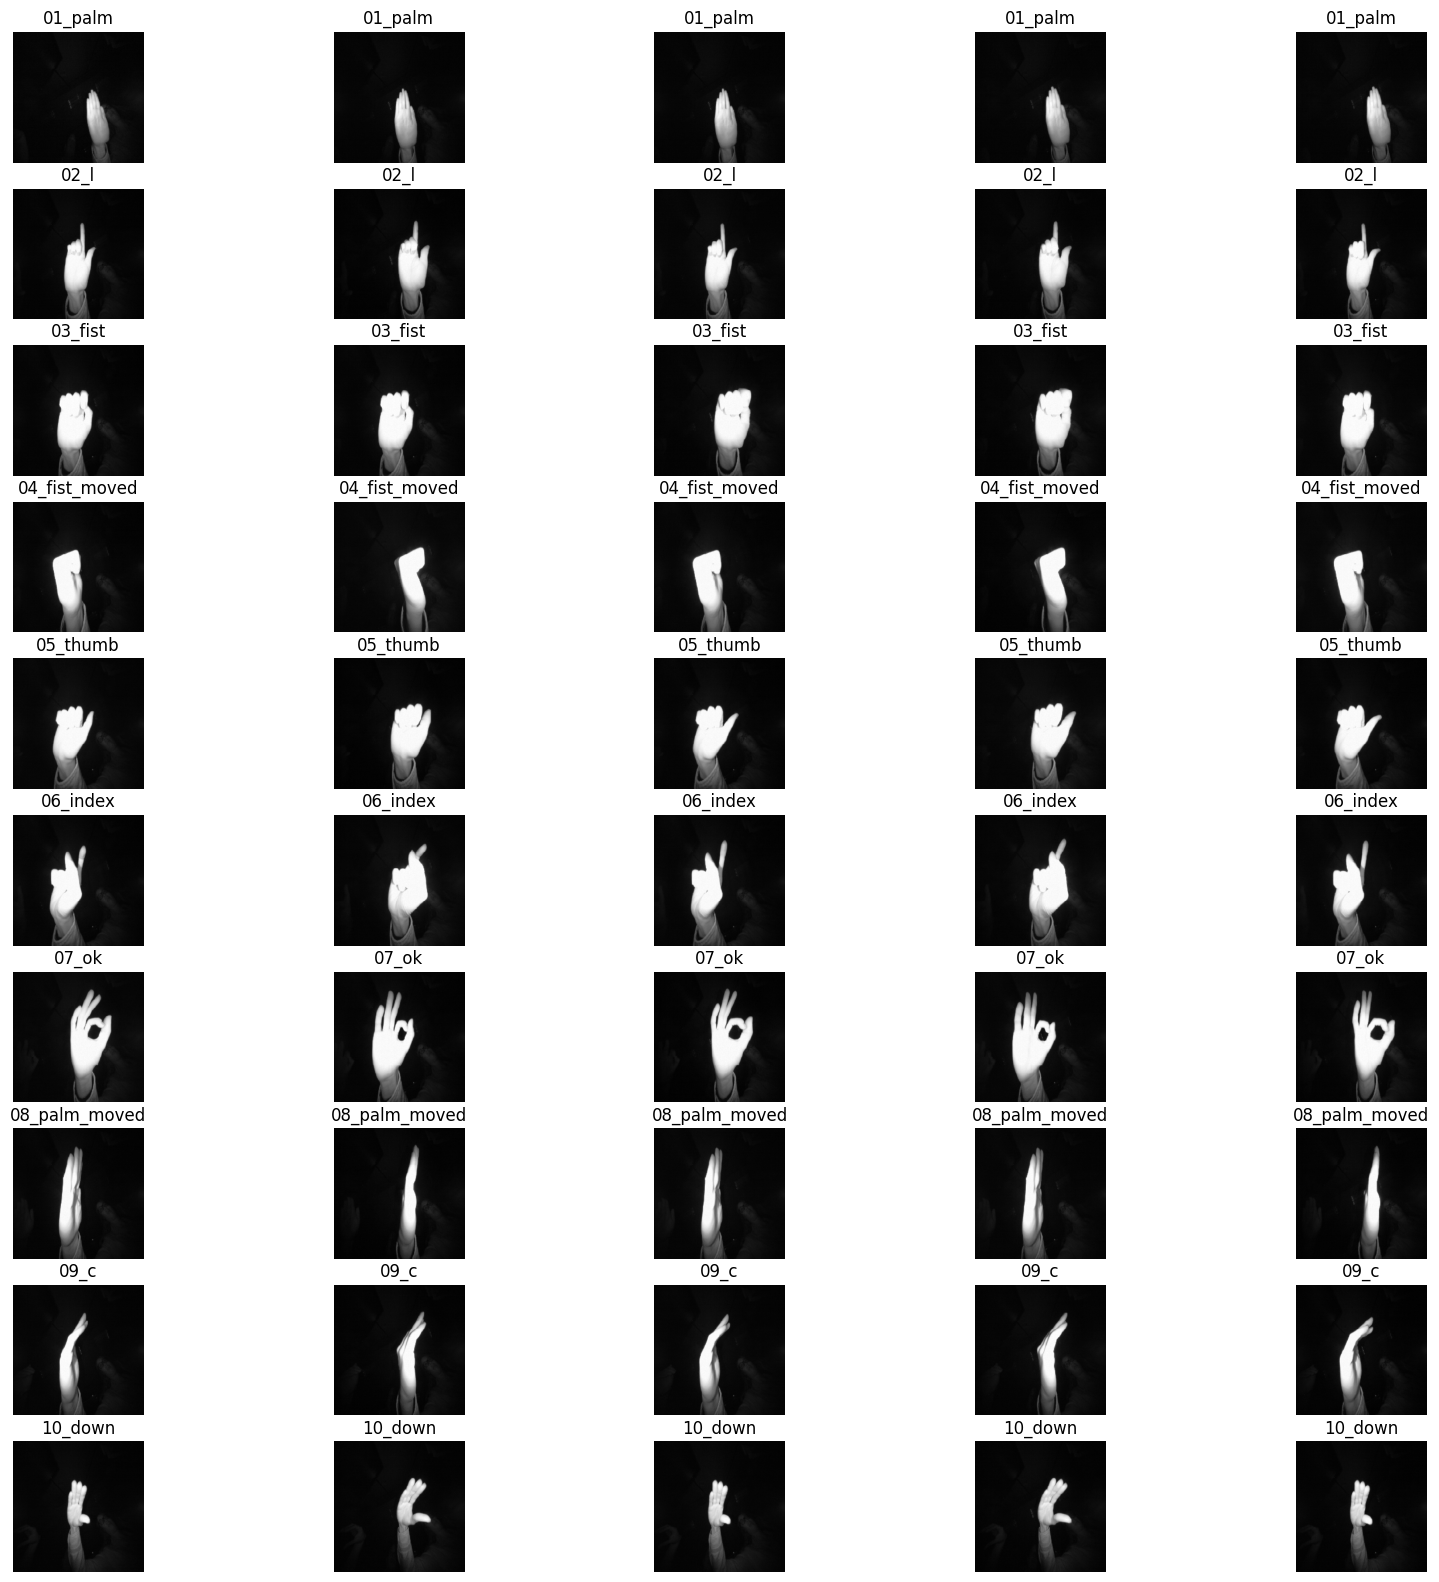

In [67]:
# Label map
gesture_folders = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', 
    '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'
]
label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}

# Display the images
display_images(file_paths, labels, label_map)

In [69]:
def get_file_paths_01_palm(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '01_palm')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

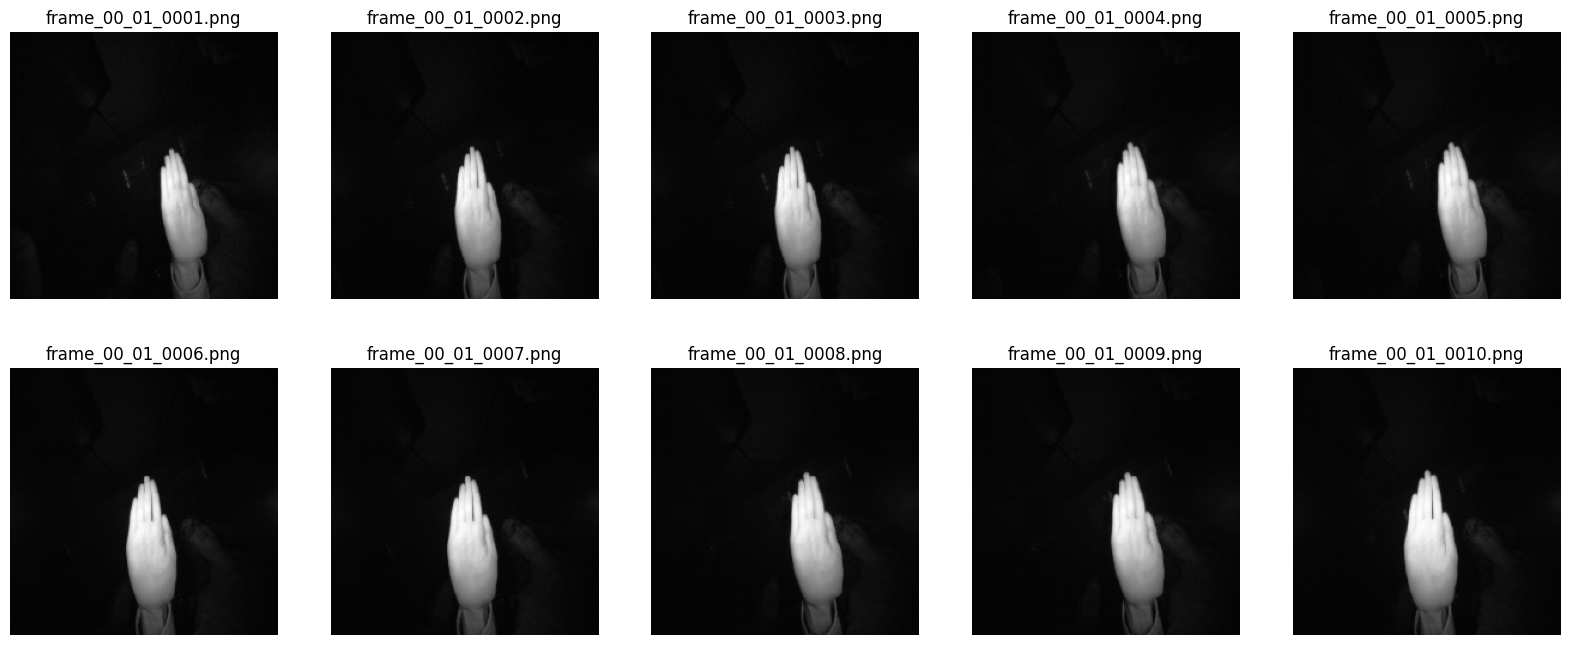

In [71]:
# Function to display images in two rows
def display_images(file_paths):
    plt.figure(figsize=(20, 8))
    for i, img_path in enumerate(file_paths[:10]):  # Ensure only 10 images are displayed
        img = load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
        img = img_to_array(img) / 255.0
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    plt.show()

# Get the file paths
file_paths_01_palm = get_file_paths_01_palm(dataset_path)

# Display the images
display_images(file_paths_01_palm)

In [73]:
def get_file_paths_02_l(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '02_l')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

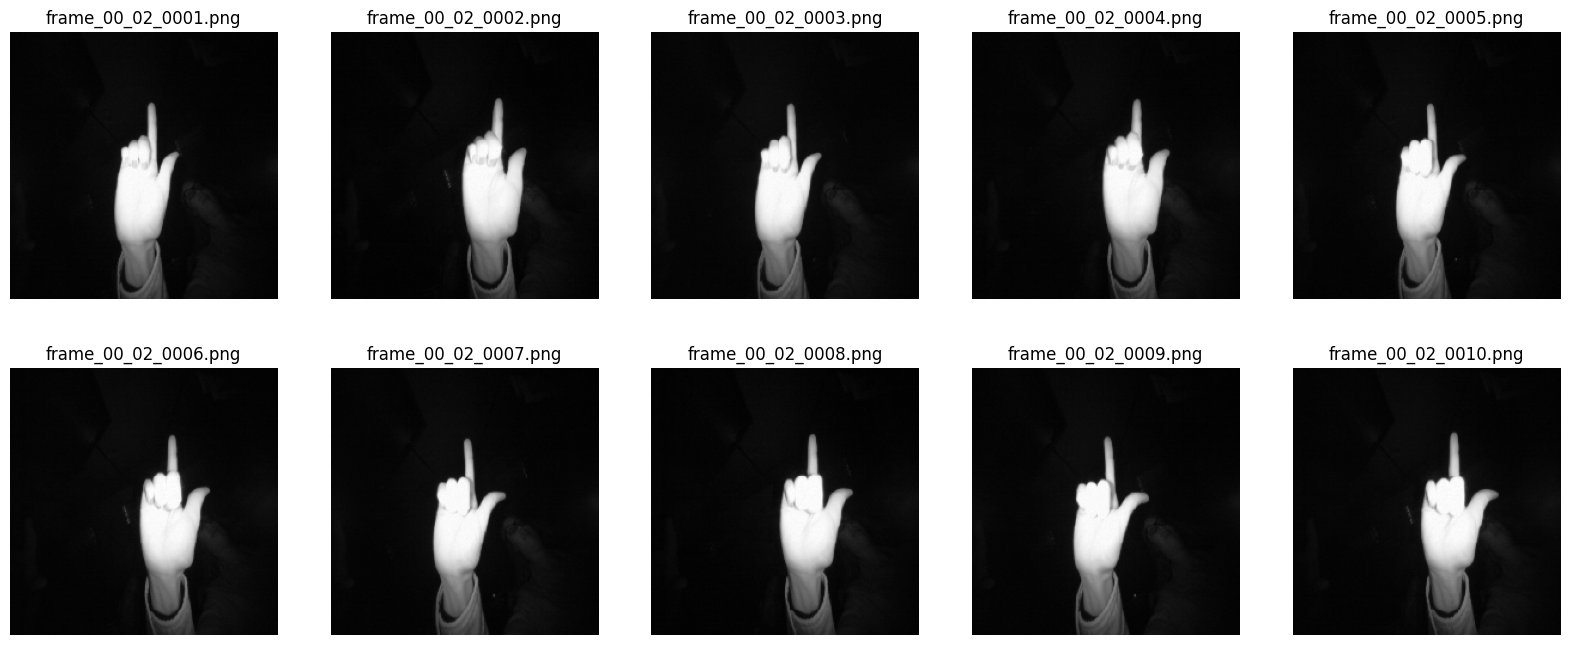

In [75]:
# Get the file paths
file_paths_02_l = get_file_paths_02_l(dataset_path)

# Display the images
display_images(file_paths_02_l)

In [77]:
def get_file_paths_03_fist(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '03_fist')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

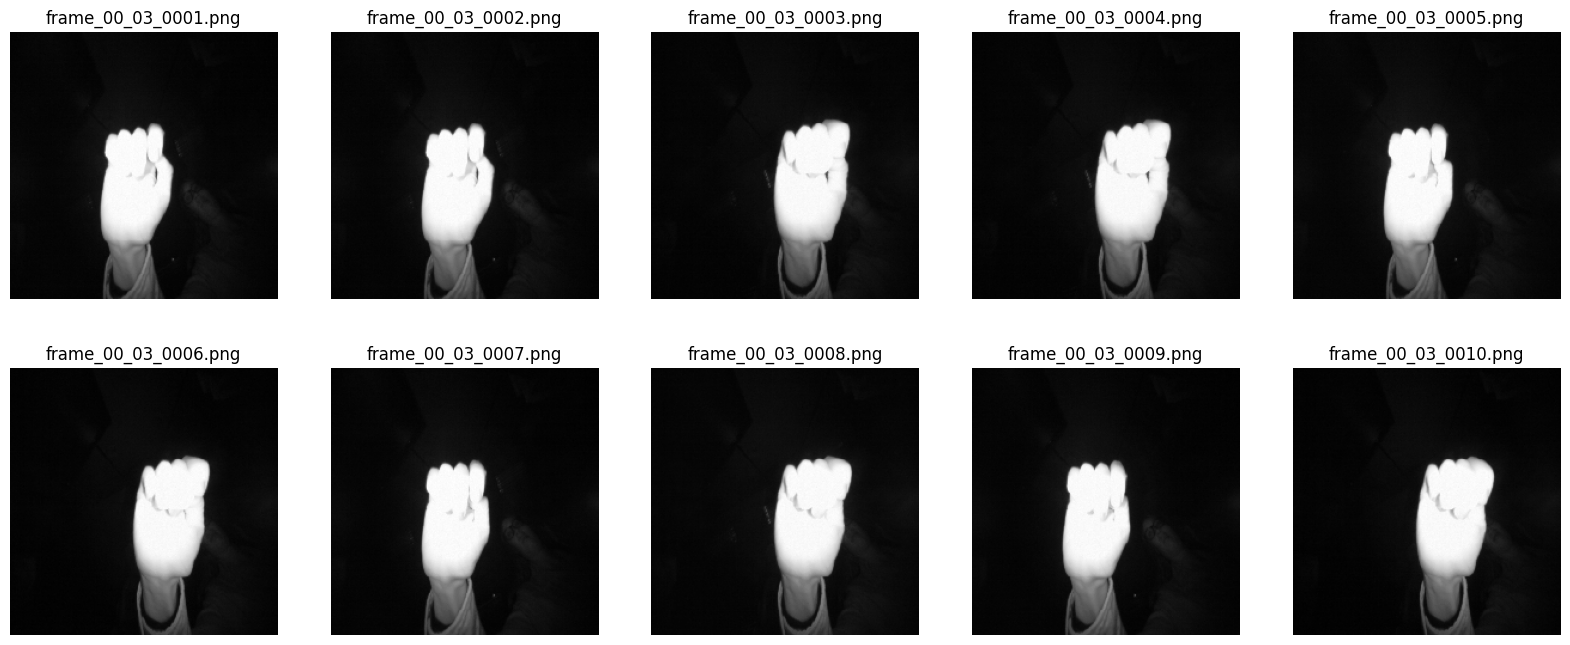

In [79]:
# Get the file paths
file_paths_03_fist = get_file_paths_03_fist(dataset_path)

# Display the images
display_images(file_paths_03_fist)

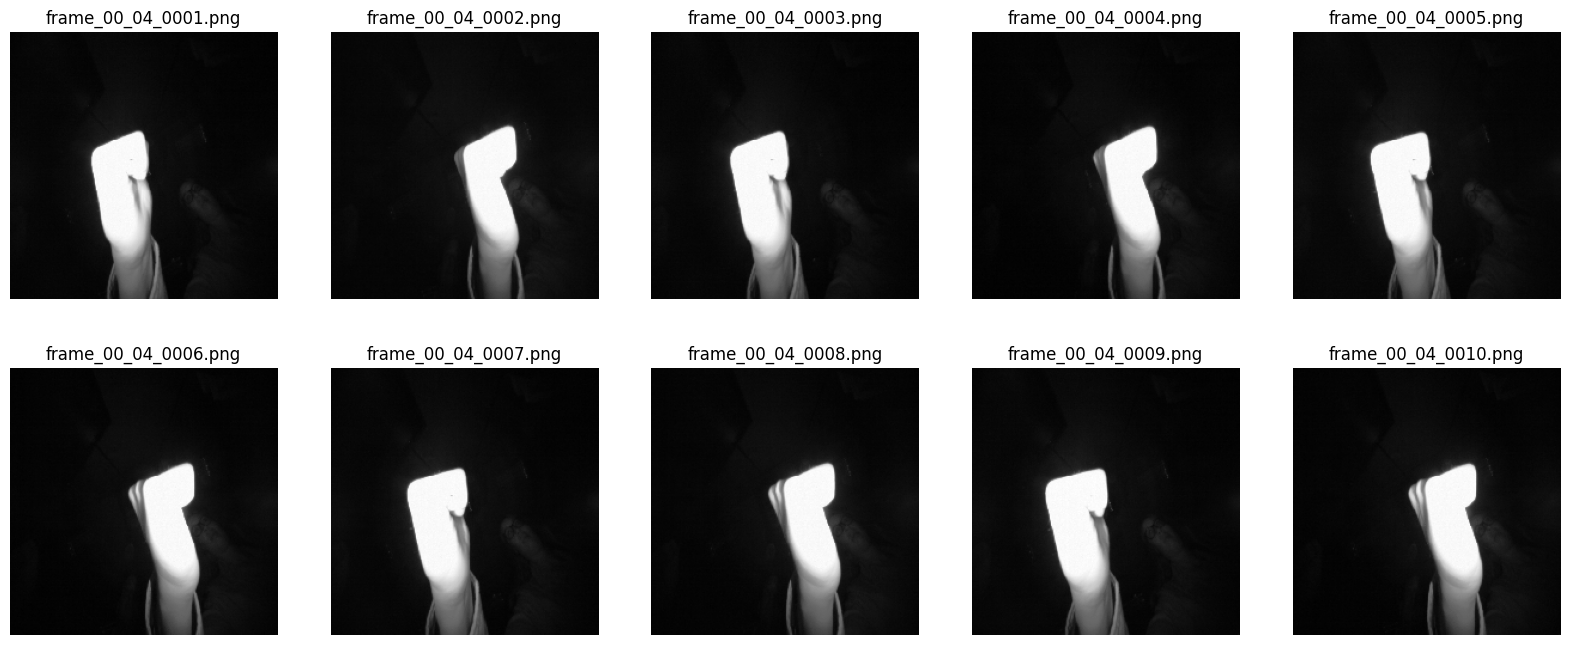

In [81]:
def get_file_paths_04_fist_moved(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '04_fist_moved')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_04_fist_moved = get_file_paths_04_fist_moved(dataset_path)
display_images(file_paths_04_fist_moved)

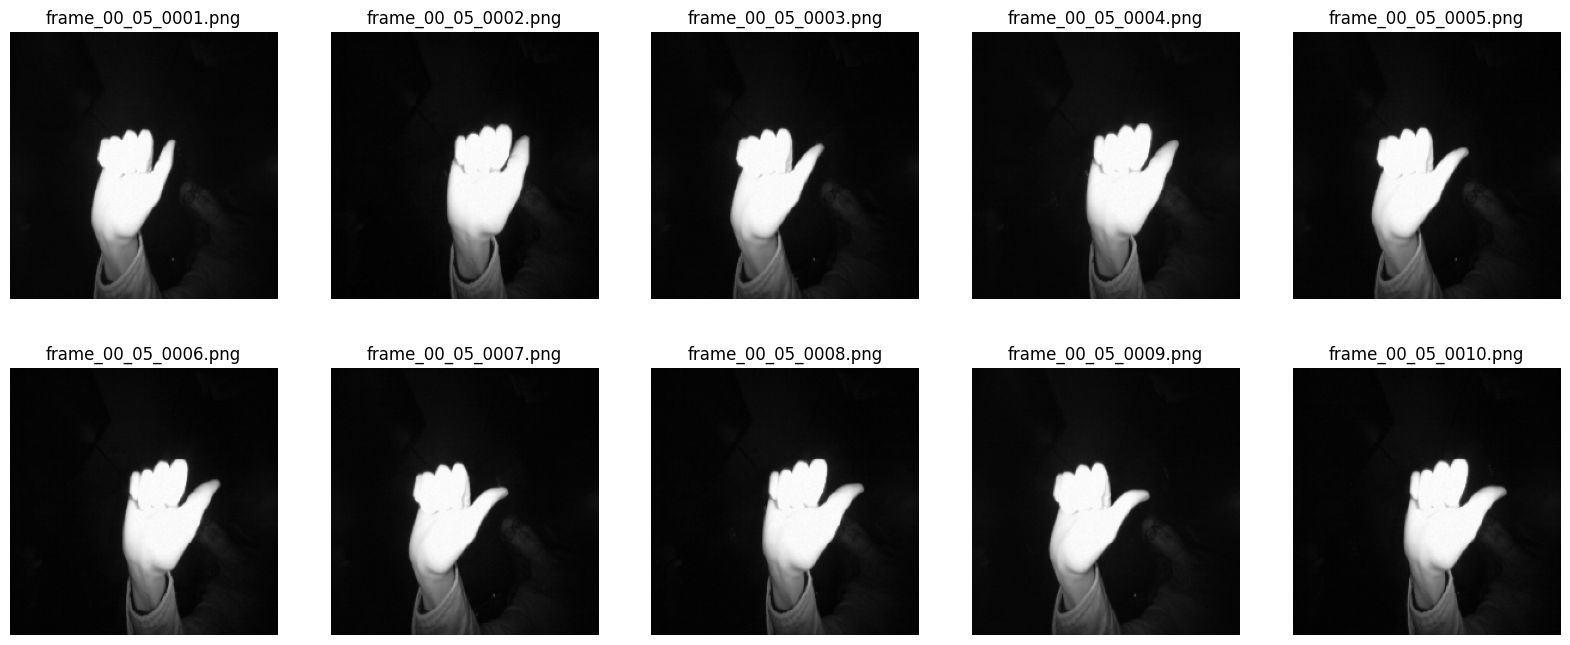

In [83]:
def get_file_paths_05_thumb(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '05_thumb')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_05_thumb = get_file_paths_05_thumb(dataset_path)
display_images(file_paths_05_thumb)

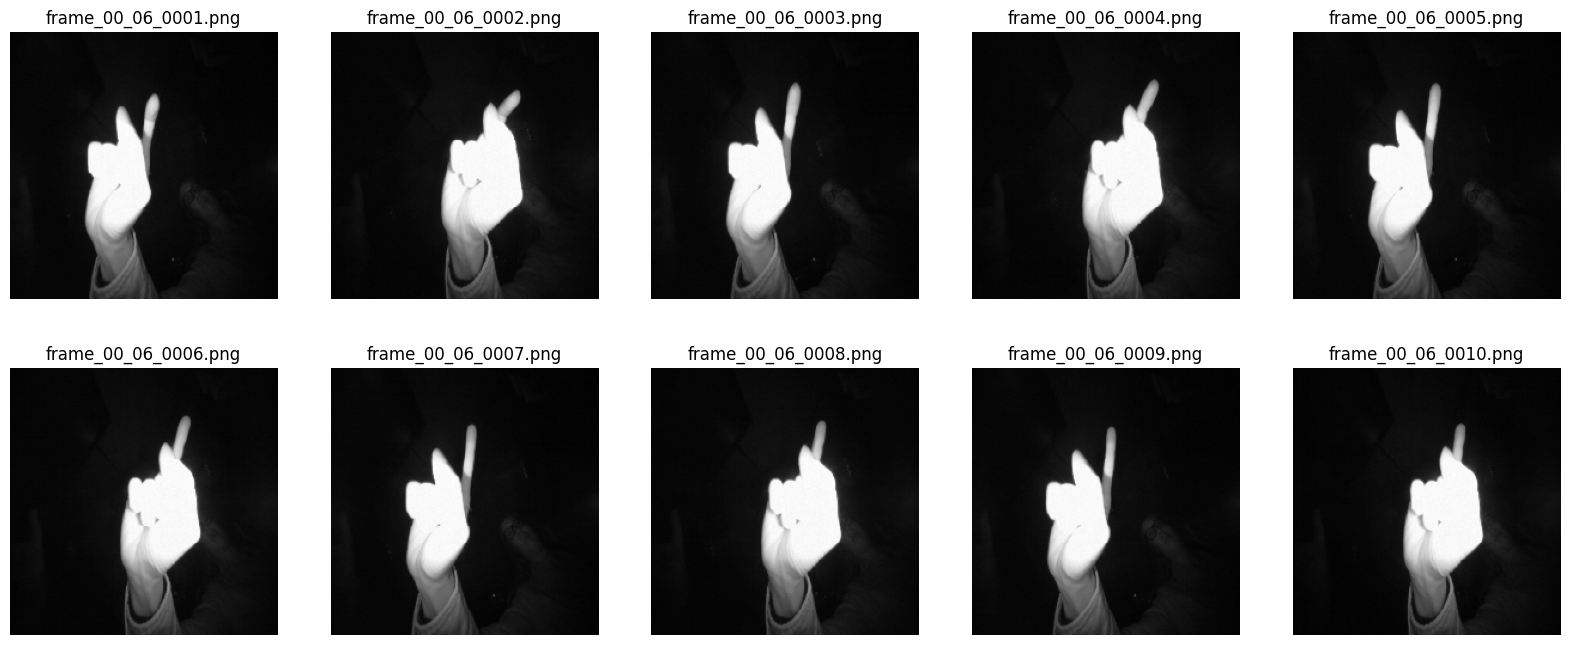

In [85]:
def get_file_paths_06_index(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '06_index')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_06_index = get_file_paths_06_index(dataset_path)
display_images(file_paths_06_index)

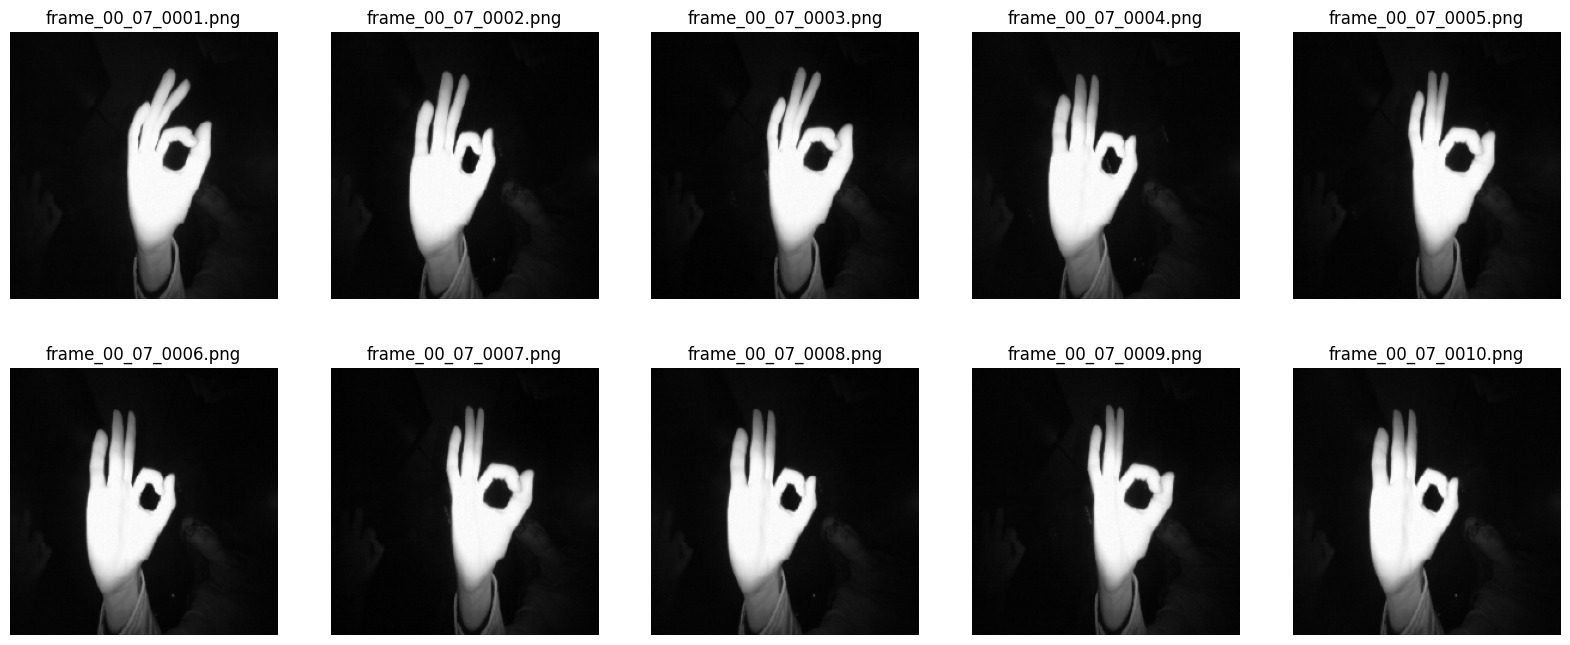

In [87]:
def get_file_paths_07_ok(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '07_ok')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_07_ok = get_file_paths_07_ok(dataset_path)
display_images(file_paths_07_ok)

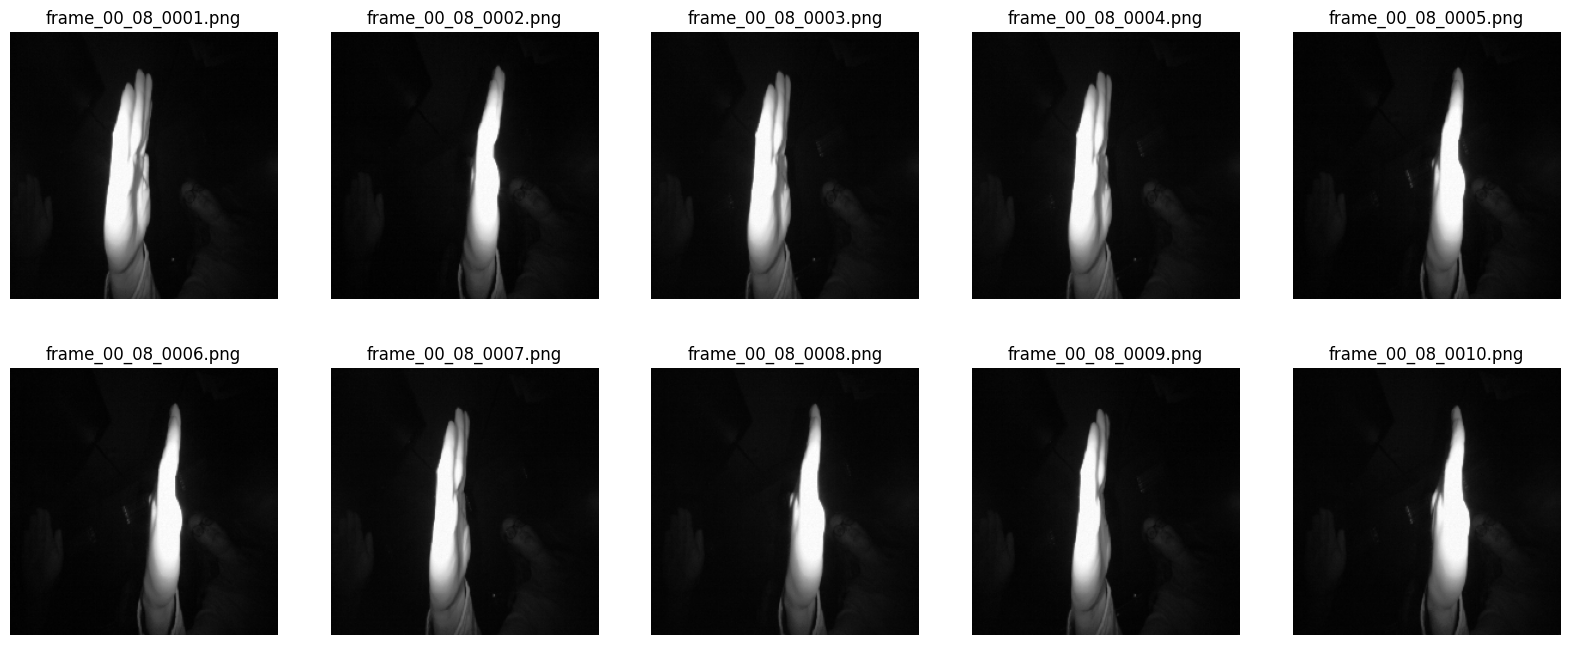

In [89]:
def get_file_paths_08_palm_moved(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '08_palm_moved')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_08_palm_moved = get_file_paths_08_palm_moved(dataset_path)
display_images(file_paths_08_palm_moved)

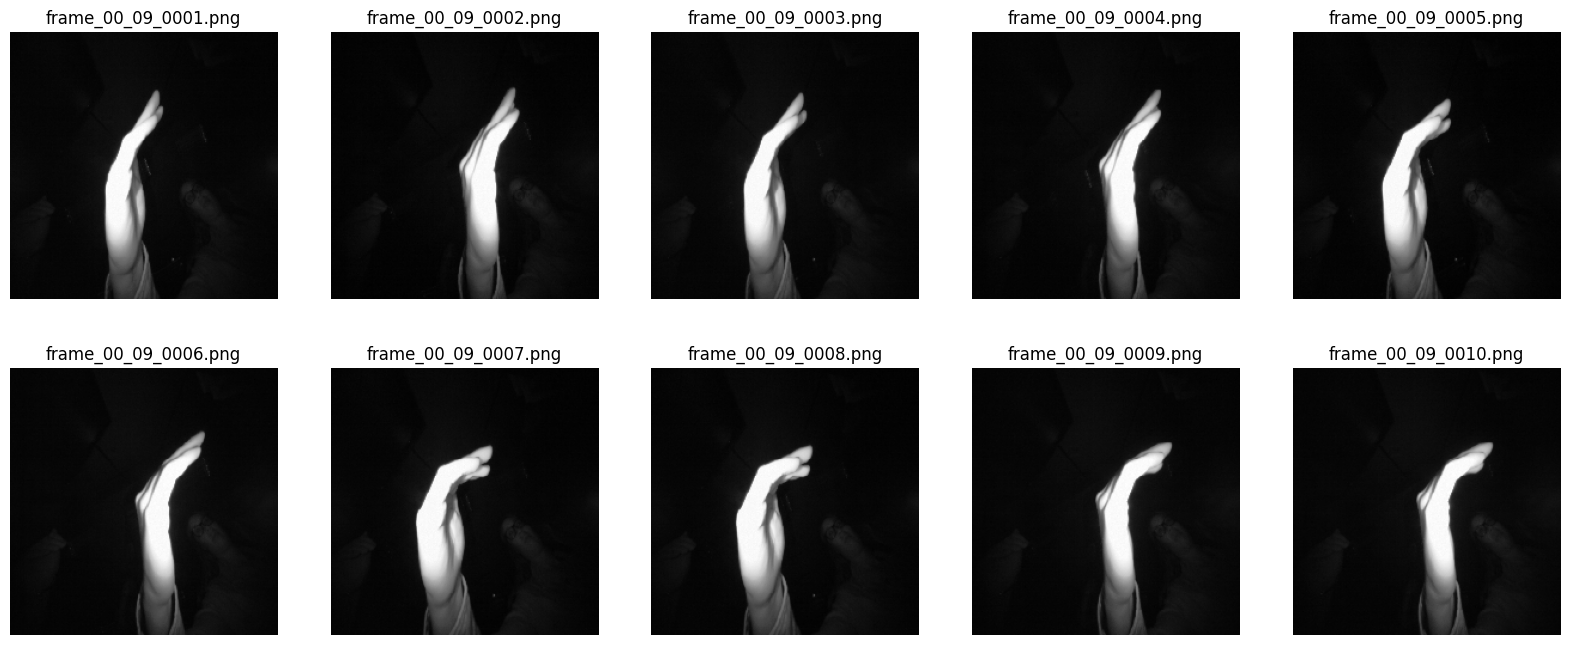

In [91]:
def get_file_paths_09_c(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '09_c')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_09_c = get_file_paths_09_c(dataset_path)
display_images(file_paths_09_c)

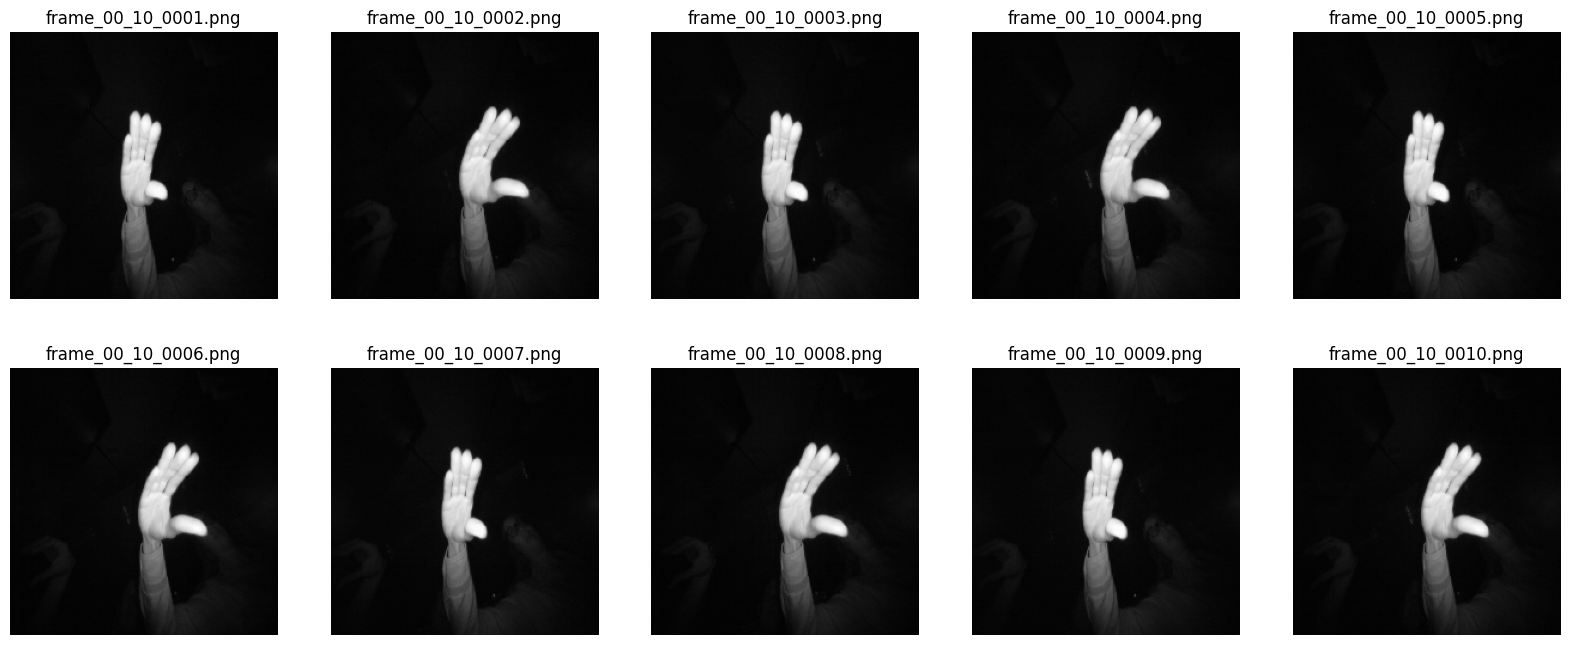

In [93]:
def get_file_paths_10_down(base_path):
    file_paths = []
    subject_folders = os.listdir(base_path)
    for subject in subject_folders:
        subject_path = os.path.join(base_path, subject, '10_down')
        if os.path.isdir(subject_path):
            count = 0
            for img_file in os.listdir(subject_path):
                if count >= 10:
                    break
                img_path = os.path.join(subject_path, img_file)
                file_paths.append(img_path)
                count += 1
    return file_paths

file_paths_10_down = get_file_paths_10_down(dataset_path)
display_images(file_paths_10_down)

In [95]:
data = list(zip(file_paths, labels))
np.random.shuffle(data)
file_paths, labels = zip(*data)

In [97]:
labels_str = [str(label) for label in labels]

In [99]:
dataframe = pd.DataFrame({'filename': file_paths, 'class': labels_str})

In [101]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # Reserve 20% of the data for validation
)

train_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=dataframe,
    x_col='filename',
    y_col='class',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 16000 validated image filenames belonging to 10 classes.
Found 4000 validated image filenames belonging to 10 classes.


In [103]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [105]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,401,226 (169.38 MB)

 Trainable params: 44,401,226 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [109]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

In [111]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.2946 - loss: 1.9630 - val_accuracy: 0.7862 - val_loss: 0.7519
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.7571 - loss: 0.7225 - val_accuracy: 0.9062 - val_loss: 0.3258
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.8626 - loss: 0.4209 - val_accuracy: 0.9398 - val_loss: 0.2101
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.9039 - loss: 0.3007 - val_accuracy: 0.9638 - val_loss: 0.1336
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.9280 - loss: 0.2222 - val_accuracy: 0.9778 - val_loss: 0.0974
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.9401 - loss: 0.1841 - val_accuracy: 0.9762 - val_loss: 0.0854
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.9519 - loss: 0.1535 - val_accuracy: 0.9835 - val_loss: 0.0598
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - accuracy: 0.9602 - loss: 0.1196 - val_accu

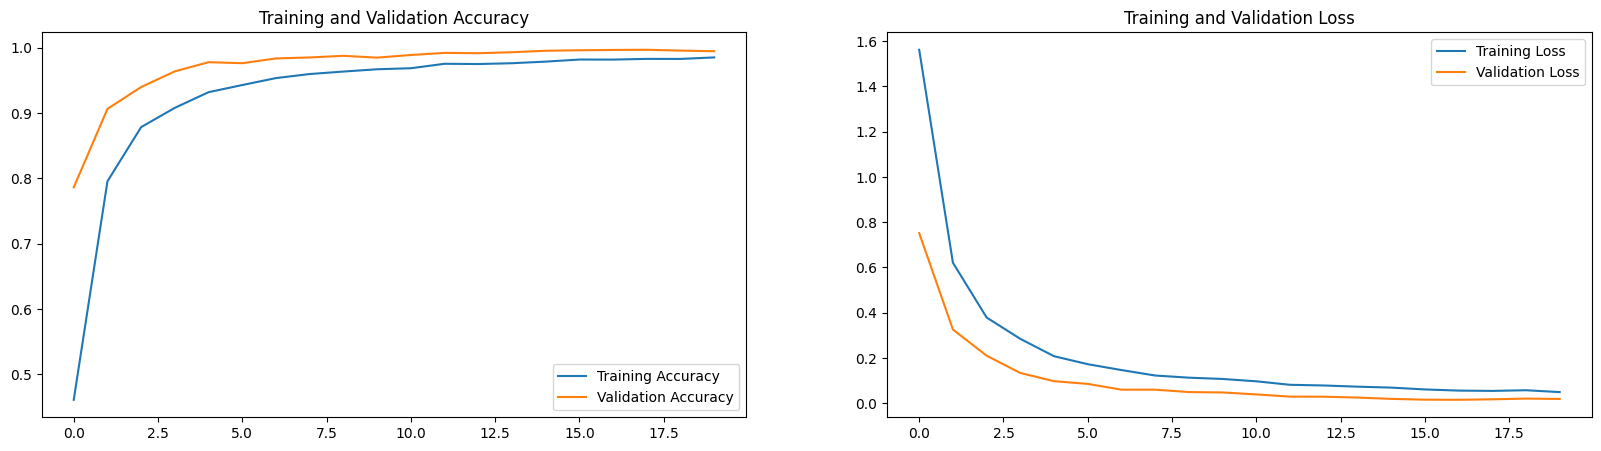

In [113]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

In [115]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 60s 478ms/step - accuracy: 0.9975 - loss: 0.0142
Validation Loss: 0.016762664541602135
Validation Accuracy: 0.9965000152587891


In [117]:
model.save('hand_gesture_recognition_model.h5')

In [119]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [123]:
img_size = 224
gesture_classes = [
    '01_palm', '02_l', '03_fist', '04_fist_moved', 
    '05_thumb', '06_index', '07_ok', '08_palm_moved', 
    '09_c', '10_down'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


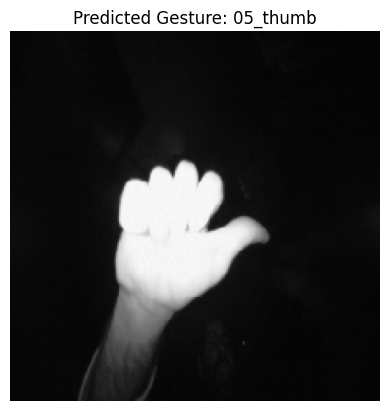

In [125]:
def load_predict_and_display(img_path, model, img_size):
    # Load and preprocess the image (RGB)
    img = load_img(img_path, color_mode='rgb', target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the gesture
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the image and the predicted class
    plt.imshow(img_array.squeeze(), cmap='gray')  # Remove 'cmap' if image is in RGB
    plt.title(f'Predicted Gesture: {gesture_classes[predicted_class]}')
    plt.axis('off')
    plt.show()

# Load the trained model
loaded_model = load_model('hand_gesture_recognition_model.h5')

# Example image path (change this to any image you want to test)
test_img_path = 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog/04/05_thumb/frame_04_05_0015.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


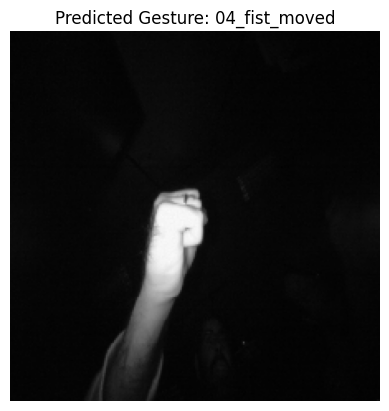

In [127]:
test_img_path = 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog/04/04_fist_moved/frame_04_04_0015.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


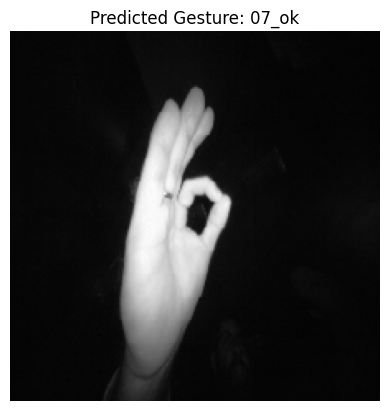

In [133]:
test_img_path = 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog/04/07_ok/frame_04_07_0016.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


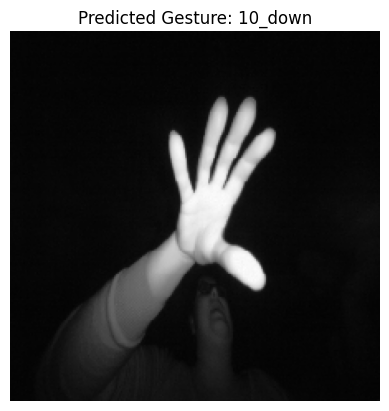

In [137]:
test_img_path = 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/leapGestRecog/05/10_down/frame_05_10_0014.png'  # Replace with your image path
img_size = 224  # Ensure this matches the size used during training

# Predict and display the gesture
load_predict_and_display(test_img_path, loaded_model, img_size)